In [1]:
# This note is created to analyze the FBI's NICS data. This data is supplemented by https://www.census.gov/
# This data is analyzed to provide insights on whether a person will be alowed to buy the guns/explosives etc.     
# based on the historical data.


# Over the course on this note-book, we will be exploring below questions on above mentioned data set.
# 1. What census data is most associated with high gun per capita?    
# 2. Which states have had the highest growth in gun registrations?
# 3. What is the overall trend of gun purchases?
import numpy as np, matplotlib.pyplot as plt, pandas as pd 
from matplotlib import style
%matplotlib inline 
%config InlineBackend.figure_format = 'retina'
style.use("fivethirtyeight")

In [2]:
census_data = pd.read_csv('u.s.-census-data.csv')
gun_data = pd.read_excel('gun-data.xlsx')

In [3]:
census_data.head(1)

,Fact,Fact Note,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
0,"Population estimates, July 1, 2016, (V2016)",NaN,"4,863,300","741,894","6,931,071","2,988,248","39,250,017","5,540,545","3,576,452","952,065",...,865454,6651194,"27,862,596","3,051,217","624,594","8,411,808","7,288,000","1,831,102","5,778,708","585,501"


In [4]:
gun_data.head(1)

,month,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,...,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
0,2017-09,Alabama,16717.0,0.0,5734.0,6320.0,221.0,317,0.0,15.0,...,0.0,0.0,0.0,9.0,16.0,3.0,0.0,0.0,3.0,32019


In [5]:
census_data.tail(1)

,Fact,Fact Note,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
84,Z,Value greater than zero but less than half uni...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
census_data.shape


(85, 52)

In [7]:
gun_data.shape

(12485, 27)

In [8]:
gun_data.tail(2)

,month,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,...,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
12483,1998-11,Wisconsin,0.0,NaN,25.0,214.0,NaN,2,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,241
12484,1998-11,Wyoming,8.0,NaN,45.0,49.0,NaN,5,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,107


In [9]:
states_list = list(set(gun_data.state.tolist())) #Print set of unique states in the gun data 
print(states_list)

['North Carolina', 'Georgia', 'Idaho', 'Indiana', 'New Mexico', 'Rhode Island', 'Michigan', 'Arkansas', 'Colorado', 'Minnesota', 'Arizona', 'California', 'North Dakota', 'Virginia', 'Iowa', 'District of Columbia', 'South Dakota', 'Alabama', 'Maryland', 'Missouri', 'Kansas', 'Montana', 'Nevada', 'Mississippi', 'Wisconsin', 'Ohio', 'Massachusetts', 'New Hampshire', 'Guam', 'Maine', 'Delaware', 'Kentucky', 'Nebraska', 'South Carolina', 'Florida', 'Oregon', 'Tennessee', 'Texas', 'Oklahoma', 'New Jersey', 'New York', 'Puerto Rico', 'Illinois', 'Alaska', 'Utah', 'Louisiana', 'Washington', 'West Virginia', 'Mariana Islands', 'Vermont', 'Virgin Islands', 'Hawaii', 'Wyoming', 'Pennsylvania', 'Connecticut']


In [10]:
#gun_data.plot()

In [11]:
gun_data.describe()

,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,prepawn_long_gun,prepawn_other,...,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
count,12461.000000,1100.000000,12465.000000,12466.000000,5500.000000,12485.000000,12462.000000,10542.000000,10540.000000,5115.000000,...,1815.000000,990.000000,825.000000,2750.000000,2750.000000,2750.000000,2475.000000,2750.000000,2255.000000,12485.000000
mean,6413.629404,1165.956364,5940.881107,7810.847585,360.471636,268.603364,58.898090,4.828021,7.834156,0.165591,...,1.027548,0.076768,0.087273,14.936000,11.602909,1.030182,0.402020,0.441818,0.105987,21595.725911
std,23752.338269,9224.200609,8618.584060,9309.846140,1349.478273,783.185073,604.814818,10.907756,16.468028,1.057105,...,4.386296,0.634503,0.671649,71.216021,54.253090,4.467843,1.446568,1.528223,0.427363,32591.418387
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,865.000000,2078.250000,17.000000,15.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4638.000000
50%,518.000000,0.000000,3059.000000,5122.000000,121.000000,125.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12399.000000
75%,4272.000000,0.000000,7280.000000,10380.750000,354.000000,301.000000,0.000000,5.000000,8.000000,0.000000,...,0.000000,0.000000,0.000000,2.000000,4.000000,0.000000,0.000000,0.000000,0.000000,25453.000000
max,522188.000000,116681.000000,107224.000000,108058.000000,77929.000000,38907.000000,28083.000000,164.000000,269.000000,49.000000,...,64.000000,12.000000,12.000000,1017.000000,777.000000,71.000000,28.000000,17.000000,4.000000,541978.000000


In [12]:
# we'll check the data type of columns in census_data and gun_data
#census_data.info()
# census_data.dtypes #explore ata types

In [13]:
#gun_data.info()
gun_data.dtypes

month                         object
state                         object
permit                       float64
permit_recheck               float64
handgun                      float64
long_gun                     float64
other                        float64
multiple                       int64
admin                        float64
prepawn_handgun              float64
prepawn_long_gun             float64
prepawn_other                float64
redemption_handgun           float64
redemption_long_gun          float64
redemption_other             float64
returned_handgun             float64
returned_long_gun            float64
returned_other               float64
rentals_handgun              float64
rentals_long_gun             float64
private_sale_handgun         float64
private_sale_long_gun        float64
private_sale_other           float64
return_to_seller_handgun     float64
return_to_seller_long_gun    float64
return_to_seller_other       float64
totals                         int64
d

In [14]:
grouped_gun_data_by_state = gun_data.groupby('state')

In [15]:
grouped_gun_data_sum = grouped_gun_data_by_state.sum()

In [16]:
gun_state_totals = grouped_gun_data_sum['totals'] 
gun_state_totals.describe()

count    5.500000e+01
mean     4.902230e+06
std      5.606927e+06
min      4.620000e+02
25%      1.180779e+06
50%      3.576312e+06
75%      6.466768e+06
max      2.976243e+07
Name: totals, dtype: float64

####  Data cleaning step

In [17]:
# step 1 : Fill missing values with the mean for that state in gun data
gun_data= gun_data.fillna(gun_data.mean(), axis=0, inplace=True)

In [18]:
# step 2 : Reomve all columns from census_data
census_data =census_data.drop('Fact Note',axis=1)

In [19]:
# step 3 : remove states which are not there in census data
# removing these unmatched states
absent_states = ['District of Columbia','Guam','Mariana Islands','Puerto Rico','Virgin Islands']
final_states_list = list(filter(lambda x: x not in absent_states, states_list))
print(final_states_list)


['North Carolina', 'Georgia', 'Idaho', 'Indiana', 'New Mexico', 'Rhode Island', 'Michigan', 'Arkansas', 'Colorado', 'Minnesota', 'Arizona', 'California', 'North Dakota', 'Virginia', 'Iowa', 'South Dakota', 'Alabama', 'Maryland', 'Missouri', 'Kansas', 'Montana', 'Nevada', 'Mississippi', 'Wisconsin', 'Ohio', 'Massachusetts', 'New Hampshire', 'Maine', 'Delaware', 'Kentucky', 'Nebraska', 'South Carolina', 'Florida', 'Oregon', 'Tennessee', 'Texas', 'Oklahoma', 'New Jersey', 'New York', 'Illinois', 'Alaska', 'Utah', 'Louisiana', 'Washington', 'West Virginia', 'Vermont', 'Hawaii', 'Wyoming', 'Pennsylvania', 'Connecticut']


In [20]:

for state in final_states_list:
    census_data[state].replace(regex=True,inplace=True,to_replace=r'\D',value=r'')
    # remove all the non digit character
    census_data[state]=pd.to_numeric(census_data[state], downcast='float', errors='ignore')
    #convert data type to float and ignore the nan value

In [21]:
#Step 4: we'll extract Year and months column based on month in Gun data
# and convert data type from string to numeric 
gun_data['year']=gun_data['month'].apply(lambda x: x.split("-")[0]).astype(int)
gun_data['year'].unique()



array([2017, 2016, 2015, 2014, 2013, 2012, 2011, 2010, 2009, 2008, 2007,
       2006, 2005, 2004, 2003, 2002, 2001, 2000, 1999, 1998])

In [22]:
gun_data['months'] = gun_data['month'].apply(lambda x: x.split("-")[1]).astype(int)
gun_data['months'].unique()

array([ 9,  8,  7,  6,  5,  4,  3,  2,  1, 12, 11, 10])

In [23]:
gun_data.head(1)

,month,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,...,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals,year,months
0,2017-09,Alabama,16717.0,0.0,5734.0,6320.0,221.0,317,0.0,15.0,...,0.0,9.0,16.0,3.0,0.0,0.0,3.0,32019,2017,9


In [24]:
gun_data_columns = list(gun_data)[2:]
print(gun_data_columns)
print(len(gun_data_columns))

['permit', 'permit_recheck', 'handgun', 'long_gun', 'other', 'multiple', 'admin', 'prepawn_handgun', 'prepawn_long_gun', 'prepawn_other', 'redemption_handgun', 'redemption_long_gun', 'redemption_other', 'returned_handgun', 'returned_long_gun', 'returned_other', 'rentals_handgun', 'rentals_long_gun', 'private_sale_handgun', 'private_sale_long_gun', 'private_sale_other', 'return_to_seller_handgun', 'return_to_seller_long_gun', 'return_to_seller_other', 'totals', 'year', 'months']
27


In [25]:
gun_data[gun_data_columns] = gun_data[gun_data_columns].applymap(np.int64) #cast to imteger values as argument of type 'float' is not iterable while plotting the graph
gun_data.head(1)

,month,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,...,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals,year,months
0,2017-09,Alabama,16717,0,5734,6320,221,317,0,15,...,0,9,16,3,0,0,3,32019,2017,9


#### Now we'll clean and wrangle census data

In [26]:
census_data.head(1)

,Fact,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,Florida,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
0,"Population estimates, July 1, 2016, (V2016)",4863300.0,741894.0,6931071.0,2988248.0,39250016.0,5540545.0,3576452.0,952065.0,20612440.0,...,865454.0,6651194.0,27862596.0,3051217.0,624594.0,8411808.0,7288000.0,1831102.0,5778708.0,585501.0


In [27]:
census_data.set_index('Fact',inplace=True)

In [28]:
census_data = census_data.T.reset_index()  # interchanging rows and columns to align it with gun data

In [29]:
census_data.rename(columns={'index':'state'},inplace = True)

In [30]:
census_data.head(1)

Fact,state,"Population estimates, July 1, 2016, (V2016)","Population estimates base, April 1, 2010, (V2016)","Population, percent change - April 1, 2010 (estimates base) to July 1, 2016, (V2016)","Population, Census, April 1, 2010","Persons under 5 years, percent, July 1, 2016, (V2016)","Persons under 5 years, percent, April 1, 2010","Persons under 18 years, percent, July 1, 2016, (V2016)","Persons under 18 years, percent, April 1, 2010","Persons 65 years and over, percent, July 1, 2016, (V2016)",...,nan,Value Flags,-,D,F,FN,nan,S,X,Z
0,Alabama,4863300.0,4780131.0,170.0,4779736.0,600.0,640.0,2260.0,2370.0,1610.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [31]:
#Get subset data for 2016 and 2010
gun_data_16=gun_data[gun_data['year'] == 2016]
gun_data_10=gun_data[gun_data['year'] == 2010]
gun_data_16.head()

,month,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,...,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals,year,months
495,2016-12,Alabama,26996,0,13733,17519,376,533,0,10,...,0,2,2,1,0,0,0,62014,2016,12
496,2016-12,Alaska,254,0,4087,3698,243,191,0,3,...,0,0,0,0,0,0,0,8786,2016,12
497,2016-12,Arizona,8900,121,18024,13785,1180,703,0,10,...,0,2,2,0,0,0,0,44887,2016,12
498,2016-12,Arkansas,3294,692,9192,13433,277,385,37,4,...,0,2,7,0,0,0,0,29926,2016,12
499,2016-12,California,61808,0,63649,93224,77929,0,0,0,...,0,0,0,0,0,0,0,298161,2016,12


In [32]:
guntotal_16= gun_data_16.groupby(['state'])['totals'].sum().reset_index()
guntotal_10= gun_data_10.groupby(['state'])['totals'].sum().reset_index()

In [33]:
guntotal_16.rename(columns={'totals':'2016_totals'},inplace = True)
guntotal_10.rename(columns={'totals':'2010_totals'},inplace = True)

In [34]:
guntotal = guntotal_16.merge(guntotal_10, on='state', how='inner')

In [35]:
result = guntotal.merge(census_data, on='state', how='inner')

In [36]:
result['Gun_Per_Capital_2016'] = result['2016_totals']/result['Population estimates, July 1, 2016,  (V2016)']


In [37]:
result['Gun_Per_Capital_2010'] = result['2010_totals']/result['Population estimates base, April 1, 2010,  (V2016)']

In [38]:
result.nlargest(5,'Gun_Per_Capital_2010')

,state,2016_totals,2010_totals,"Population estimates, July 1, 2016, (V2016)","Population estimates base, April 1, 2010, (V2016)","Population, percent change - April 1, 2010 (estimates base) to July 1, 2016, (V2016)","Population, Census, April 1, 2010","Persons under 5 years, percent, July 1, 2016, (V2016)","Persons under 5 years, percent, April 1, 2010","Persons under 18 years, percent, July 1, 2016, (V2016)",...,-,D,F,FN,nan,S,X,Z,Gun_Per_Capital_2016,Gun_Per_Capital_2010
16,Kentucky,3676847,2385579,4436974.0,4339344.0,220.0,4339367.0,620.0,650.0,2280.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.828683,0.549756
43,Utah,294907,553134,3051217.0,2763888.0,1040.0,2763885.0,830.0,950.0,3020.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.096652,0.200129
25,Montana,136337,101095,1042520.0,989414.0,540.0,989415.0,600.0,630.0,2180.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.130776,0.102177
1,Alaska,87647,65909,741894.0,710249.0,450.0,710231.0,730.0,760.0,2520.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.118140,0.092797
47,West Virginia,242350,159550,1831102.0,1853011.0,120.0,1852994.0,550.0,560.0,2050.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.132352,0.086103


In [39]:
result.nlargest(5,'Gun_Per_Capital_2016')

,state,2016_totals,2010_totals,"Population estimates, July 1, 2016, (V2016)","Population estimates base, April 1, 2010, (V2016)","Population, percent change - April 1, 2010 (estimates base) to July 1, 2016, (V2016)","Population, Census, April 1, 2010","Persons under 5 years, percent, July 1, 2016, (V2016)","Persons under 5 years, percent, April 1, 2010","Persons under 18 years, percent, July 1, 2016, (V2016)",...,-,D,F,FN,nan,S,X,Z,Gun_Per_Capital_2016,Gun_Per_Capital_2010
16,Kentucky,3676847,2385579,4436974.0,4339344.0,220.0,4339367.0,620.0,650.0,2280.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.828683,0.549756
13,Indiana,1436725,345650,6633053.0,6484136.0,230.0,6483802.0,640.0,670.0,2380.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.216601,0.053307
12,Illinois,1924070,695300,12801539.0,12831574.0,20.0,12830632.0,600.0,650.0,2290.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.150300,0.054187
47,West Virginia,242350,159550,1831102.0,1853011.0,120.0,1852994.0,550.0,560.0,2050.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.132352,0.086103
25,Montana,136337,101095,1042520.0,989414.0,540.0,989415.0,600.0,630.0,2180.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.130776,0.102177


In [40]:
fact = result.drop(['Gun_Per_Capital_2010','state','FIPS Code','2016_totals','2010_totals'],axis=1)
fact.fillna(0, inplace=True)
fact.head()

#fact.dtypes

#fact[list(fact)] = fact[list(fact)].fillna(0)
#fact = fact.astype(int)
#fact.tail()
#fact.dtypes

/usr/local/lib/python3.6/site-packages/pandas/core/frame.py:2754: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  downcast=downcast, **kwargs)


,"Population estimates, July 1, 2016, (V2016)","Population estimates base, April 1, 2010, (V2016)","Population, percent change - April 1, 2010 (estimates base) to July 1, 2016, (V2016)","Population, Census, April 1, 2010","Persons under 5 years, percent, July 1, 2016, (V2016)","Persons under 5 years, percent, April 1, 2010","Persons under 18 years, percent, July 1, 2016, (V2016)","Persons under 18 years, percent, April 1, 2010","Persons 65 years and over, percent, July 1, 2016, (V2016)","Persons 65 years and over, percent, April 1, 2010",...,Value Flags,-,D,F,FN,nan,S,X,Z,Gun_Per_Capital_2016
0,4863300.0,4780131.0,170.0,4779736.0,600.0,640.0,2260.0,2370.0,1610.0,1380.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.126858
1,741894.0,710249.0,450.0,710231.0,730.0,760.0,2520.0,2640.0,1040.0,770.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.118140
2,6931071.0,6392301.0,840.0,6392017.0,630.0,710.0,2350.0,2550.0,1690.0,1380.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.060060
3,2988248.0,2916025.0,250.0,2915918.0,640.0,680.0,2360.0,2440.0,1630.0,1440.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.089020
4,39250016.0,37254520.0,540.0,37253956.0,630.0,680.0,2320.0,2500.0,1360.0,1140.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.060565


TypeError: argument of type 'float' is not iterable

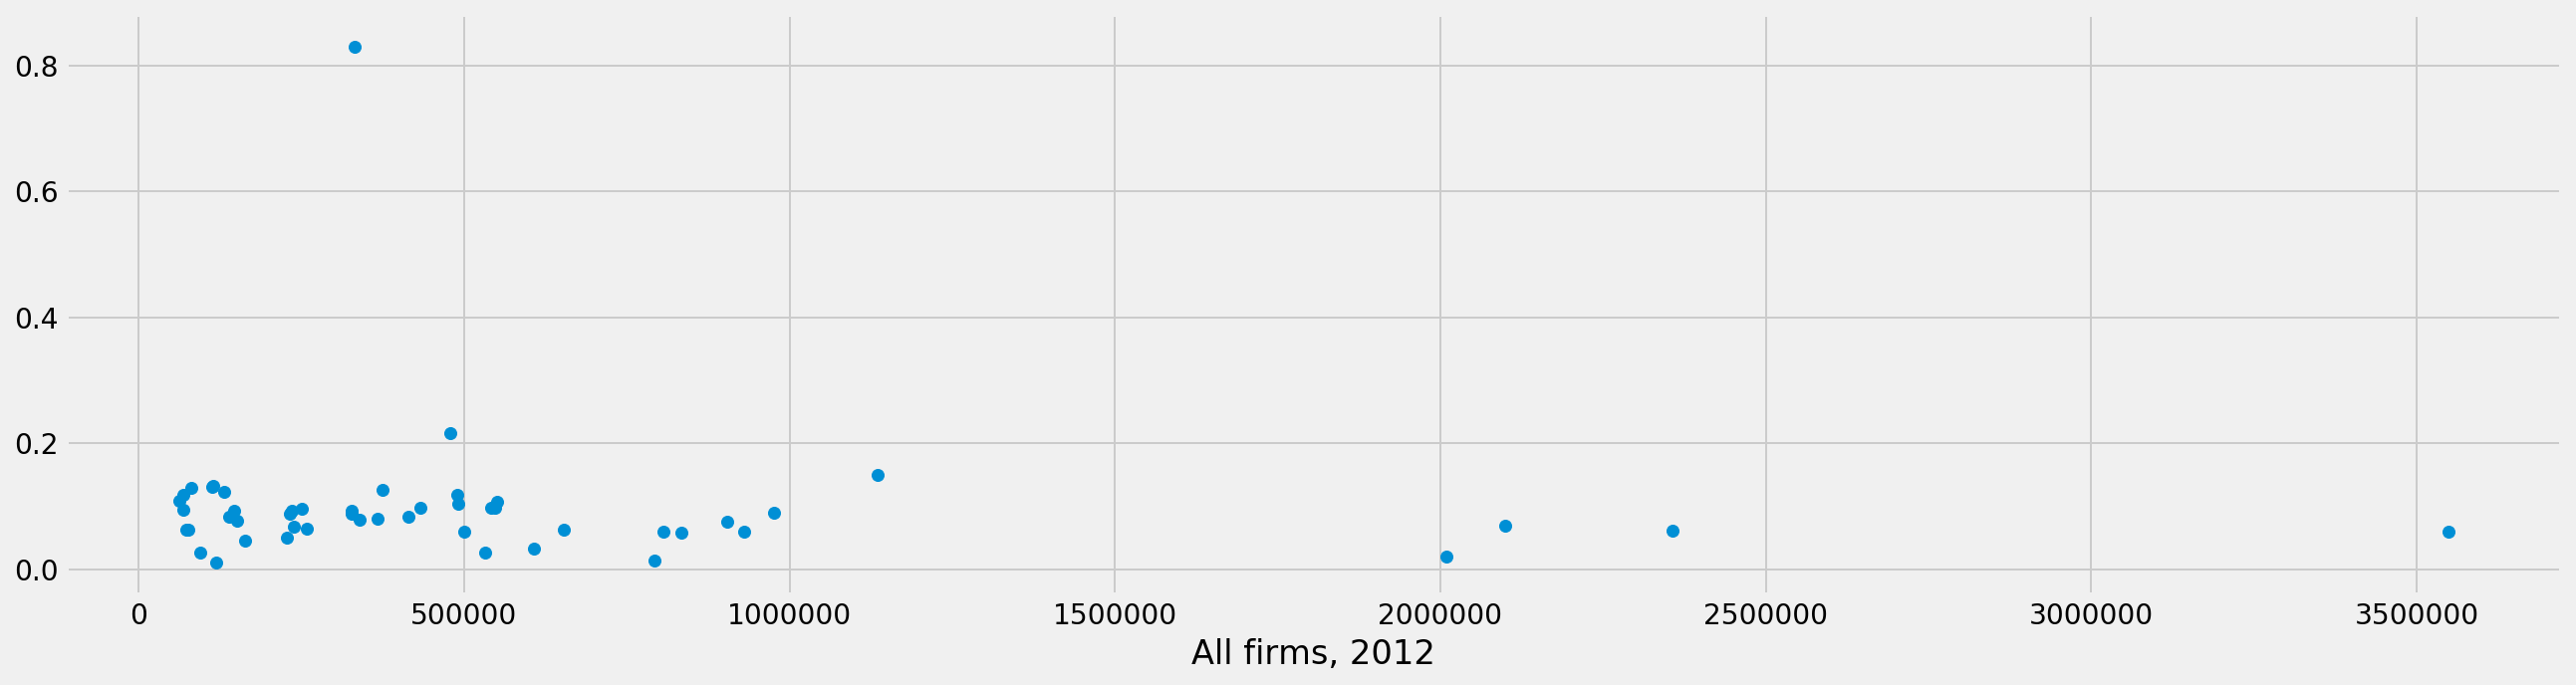

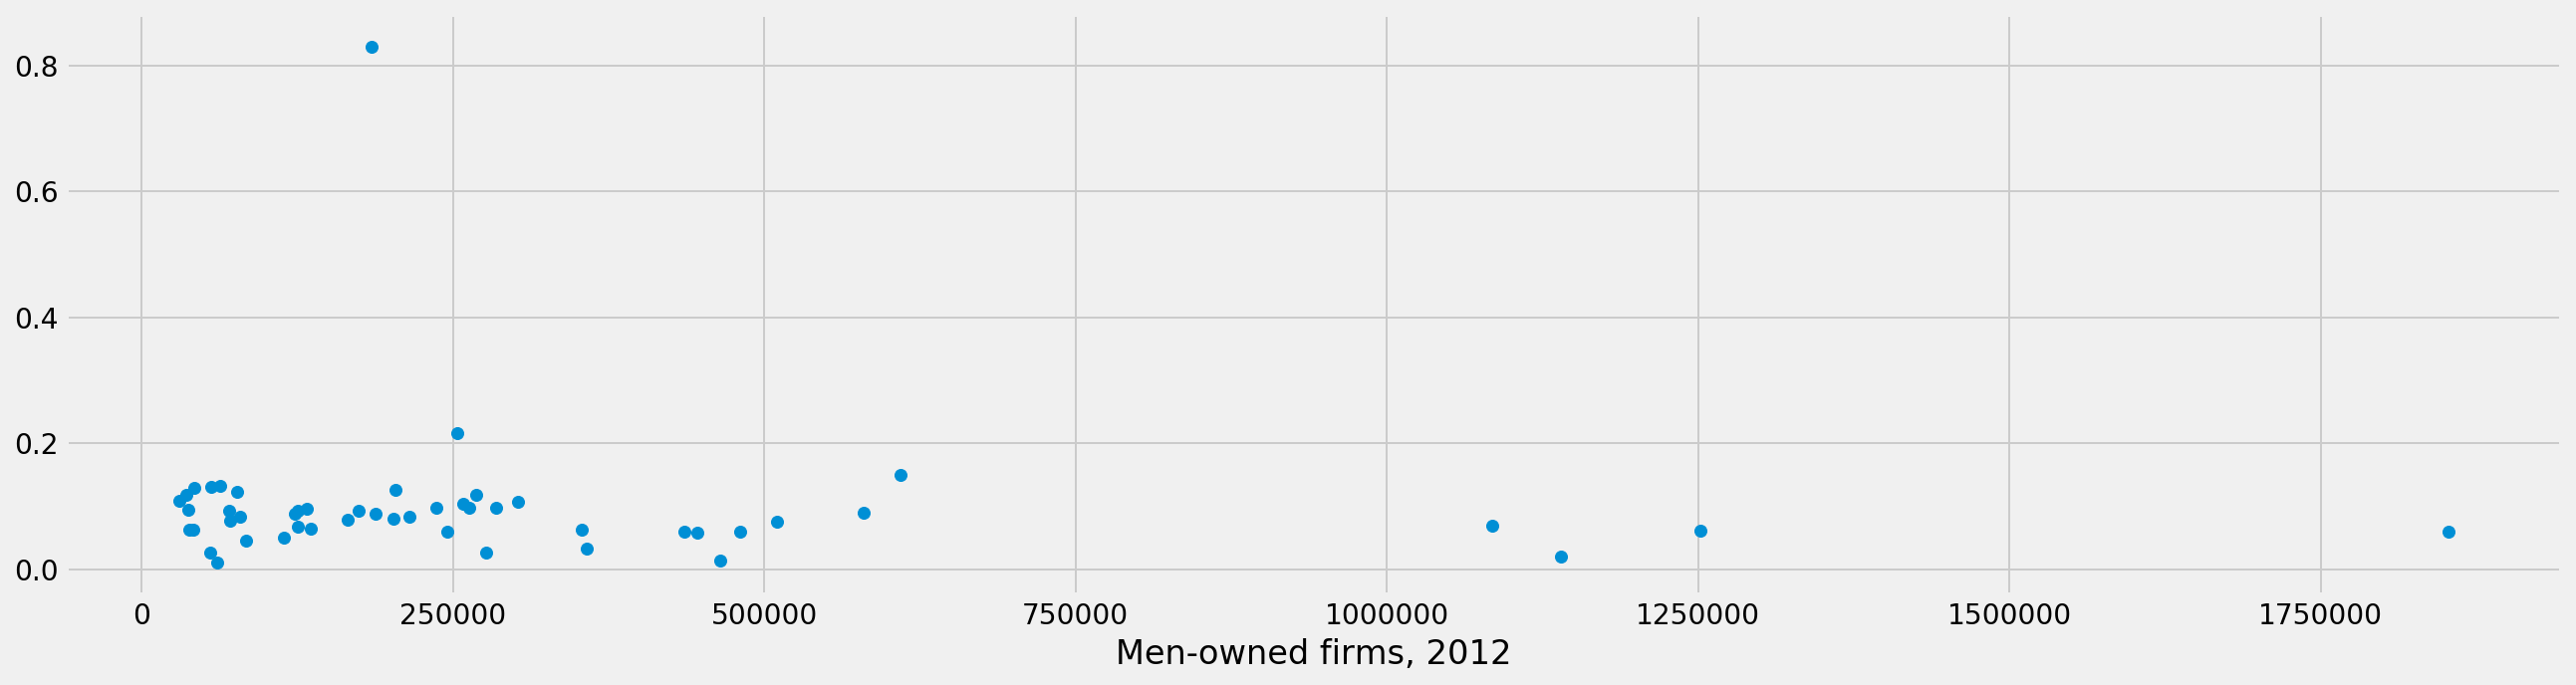

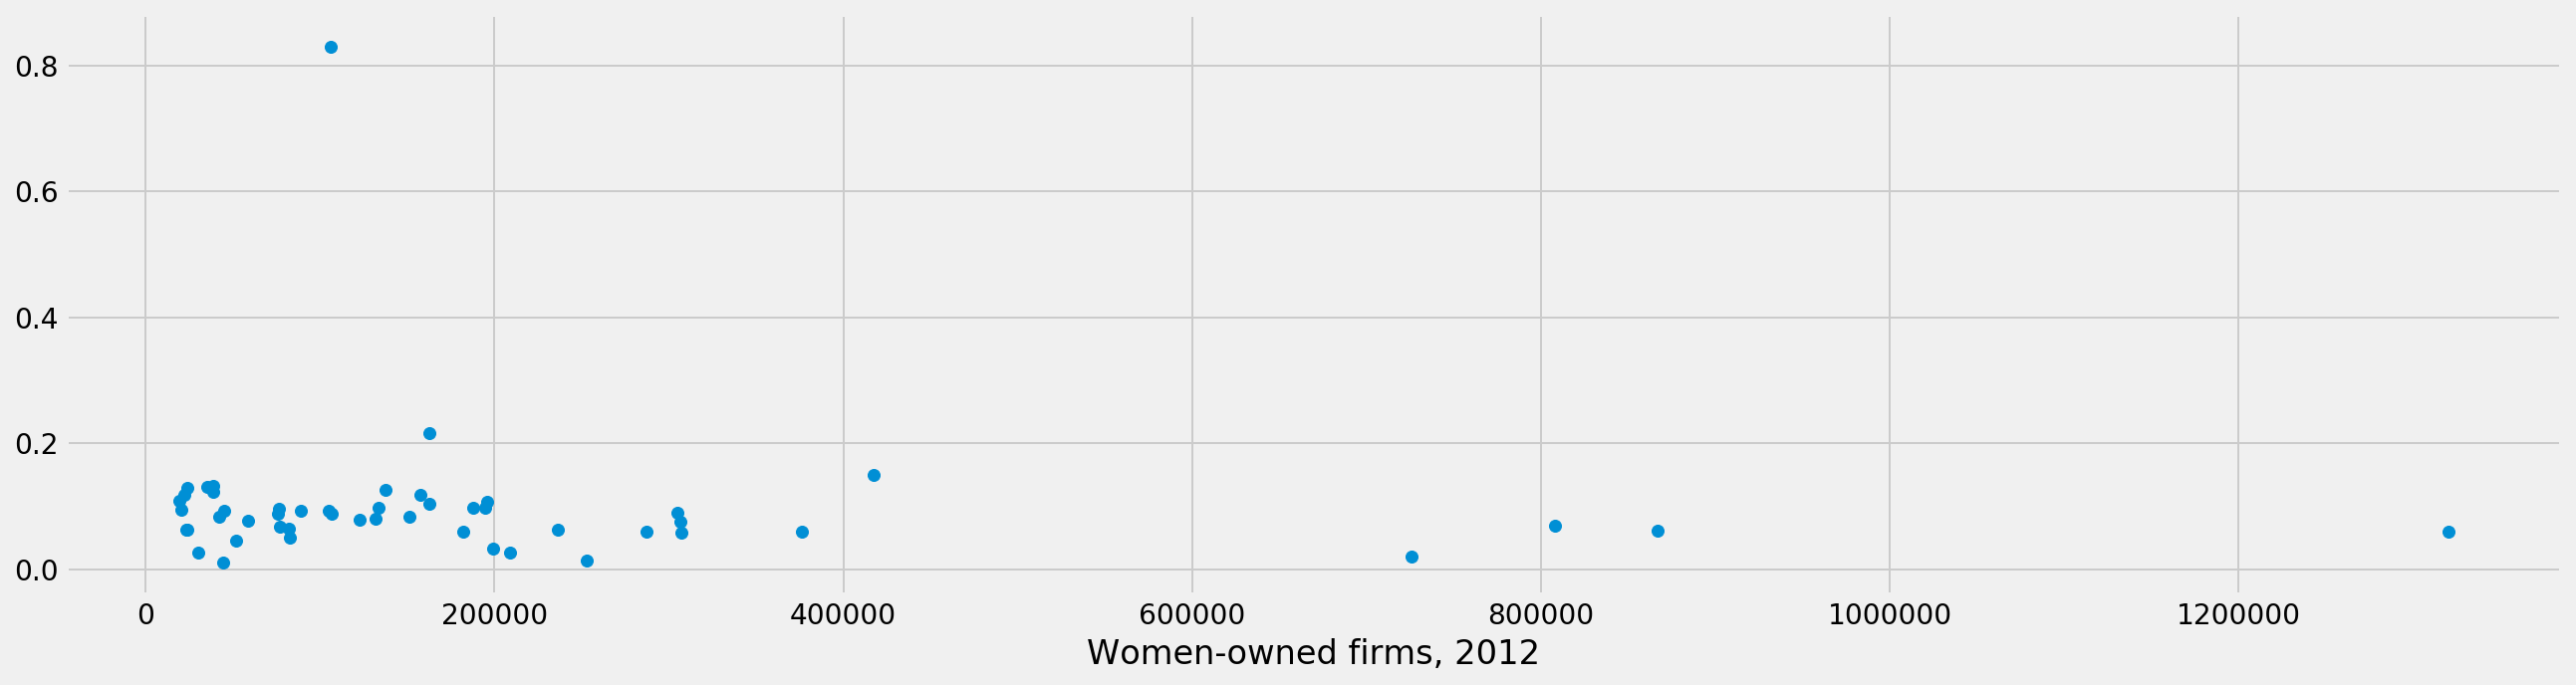

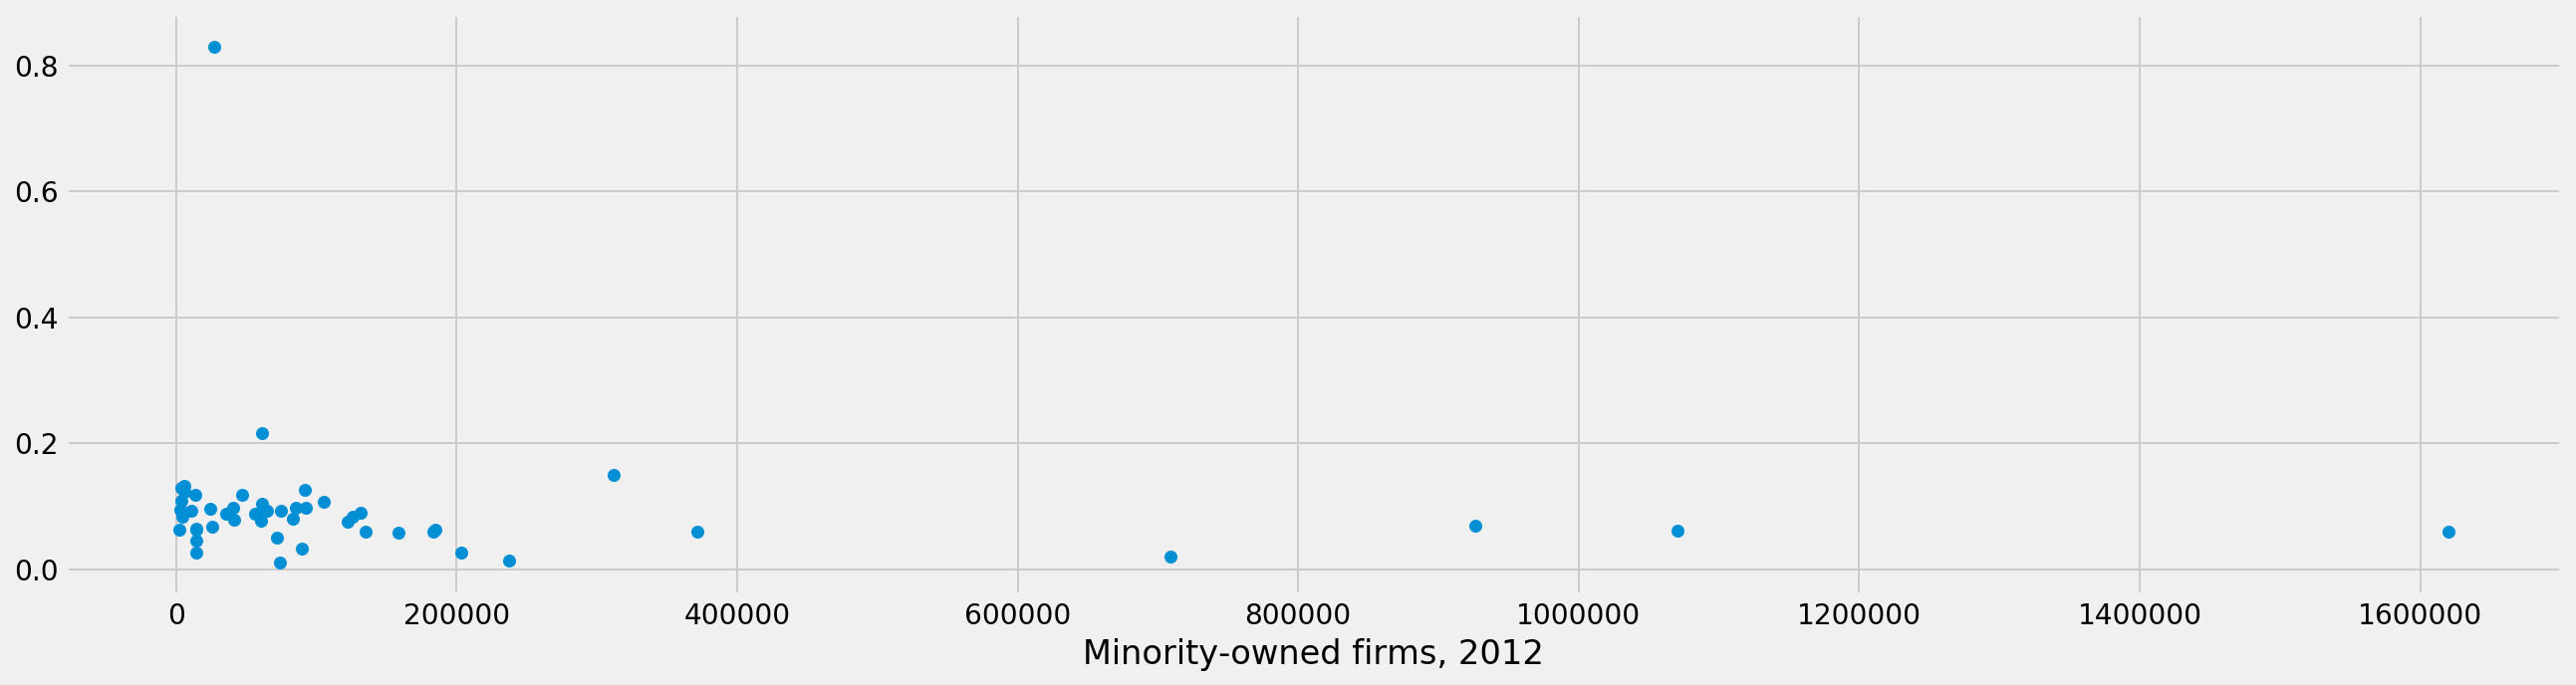

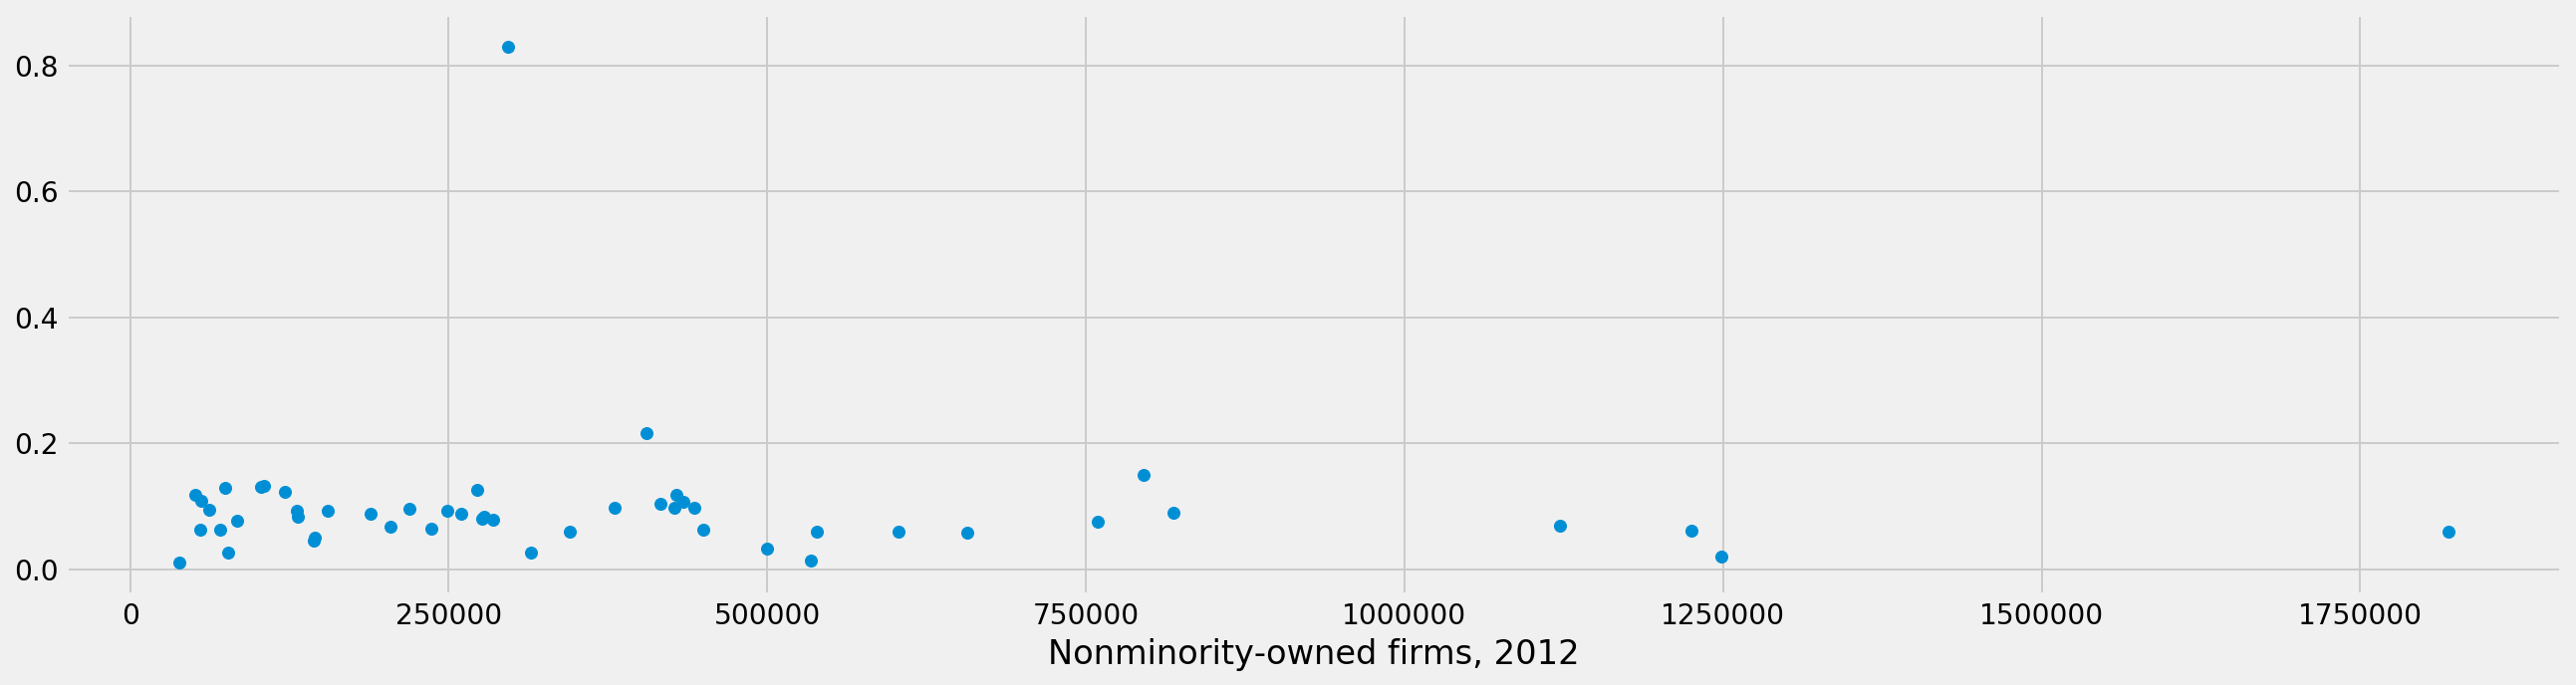

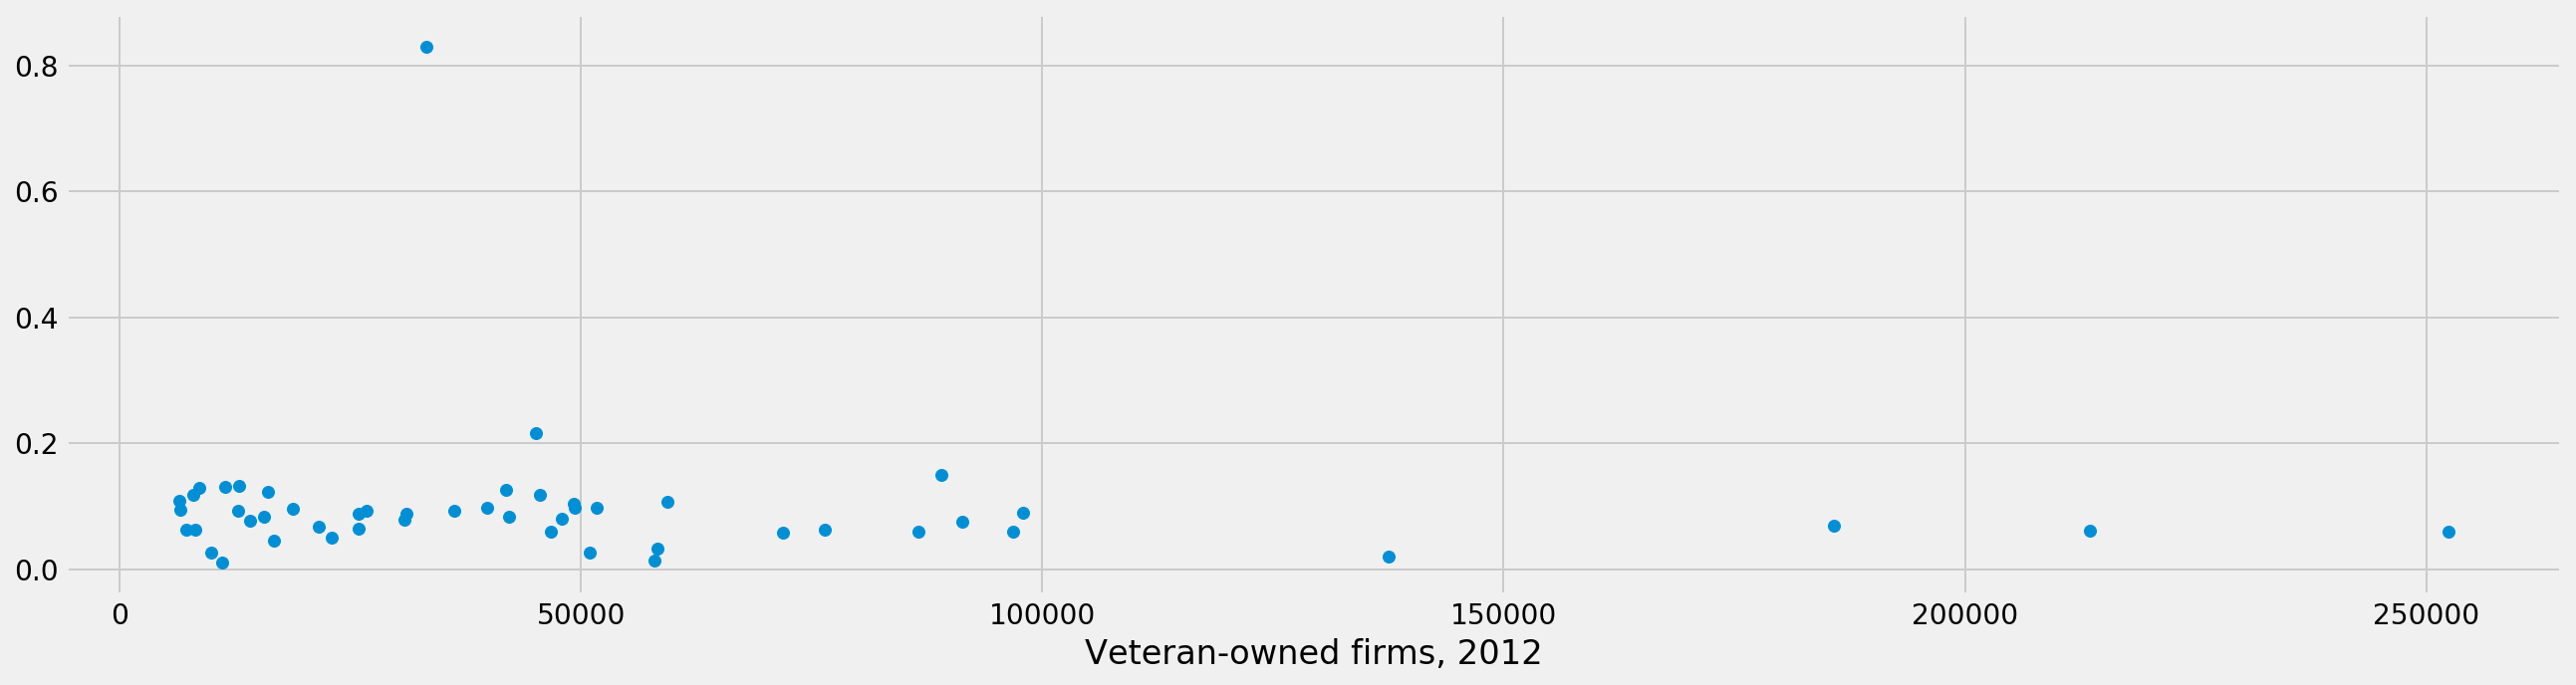

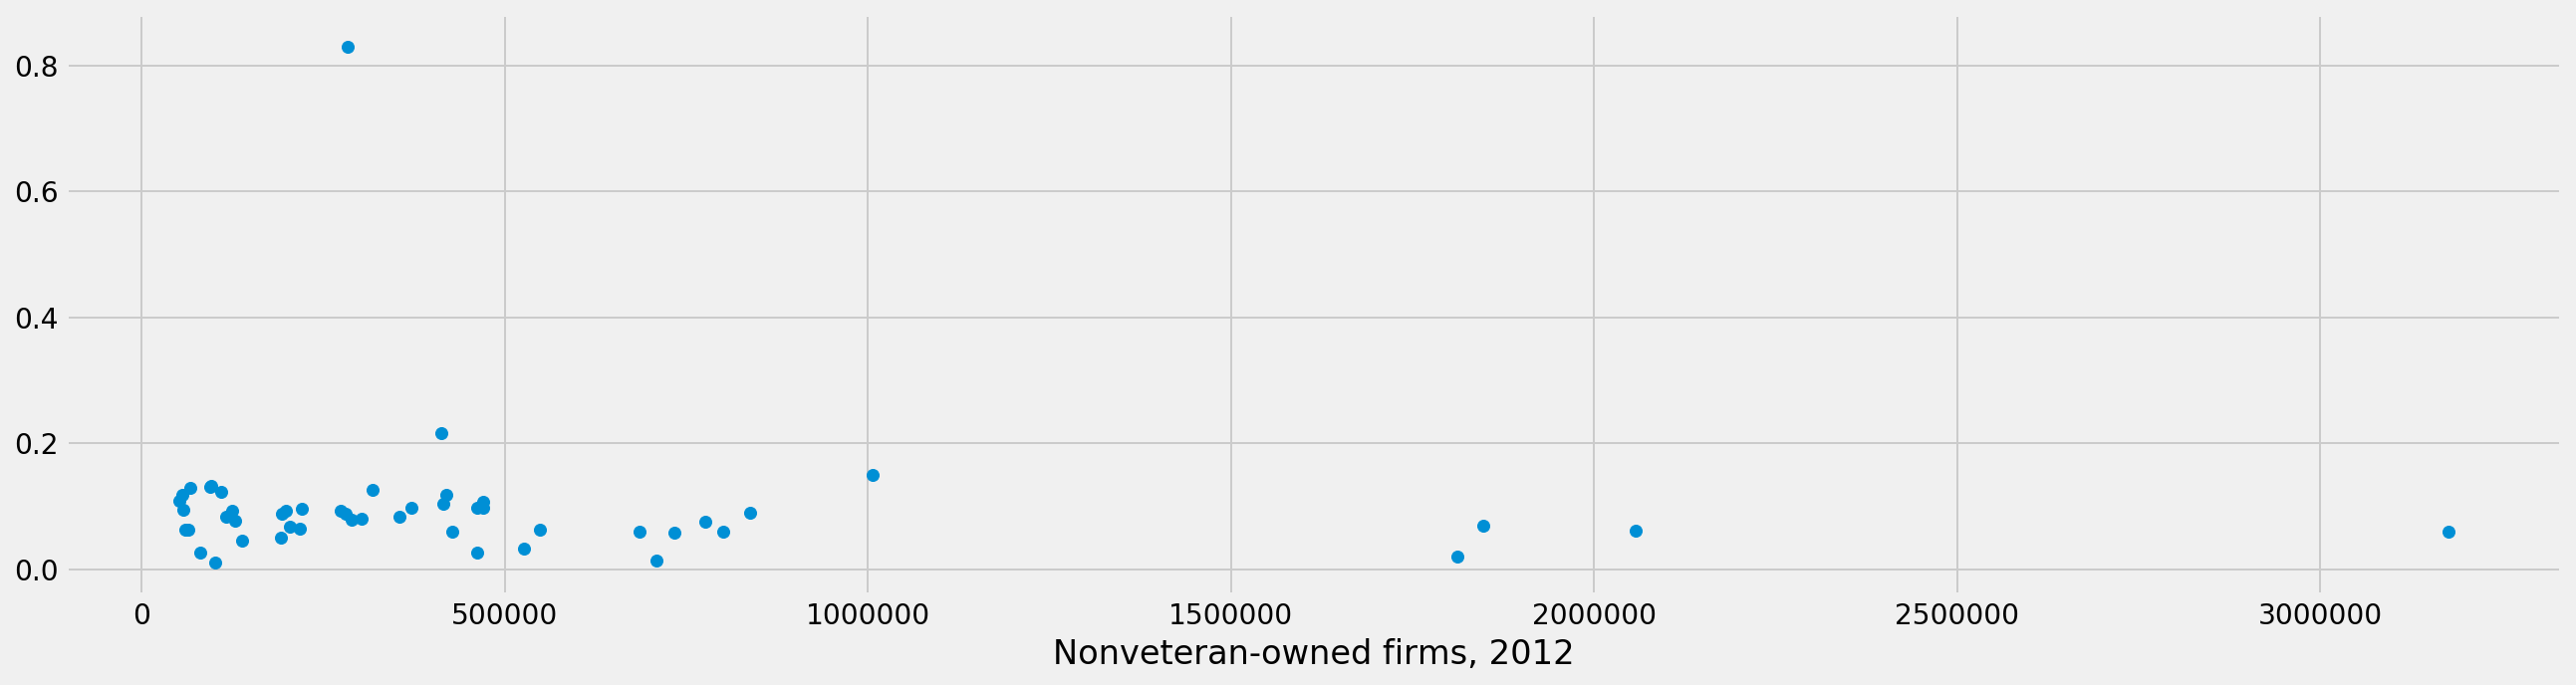

In [74]:
#create scatter plot for all the fact variable in speparate figure by Name Group

#figure1: firms related Variable and Gun_Per_Capital 
#Use for loop to create scatter plot for  firms variable in one figure
#TODO : need help while iterating heterogeneous data type loops as gettign error as : "argument of type 'float' is not iterable"
#Also, how do I plot all in one plot with legend?
# plt.figure(figsize=(20,5))
for col in list(fact):
    #print(type(col))
    if 'firms' in col:
        plt.figure(figsize=(20,5))
        plt.scatter(fact[col], fact['Gun_Per_Capital_2016'], label =col)
        plt.xlabel(col)

plt.ylabel("Gun_Per_Capital_2016")
plt.legend()
plt.show()

TypeError: argument of type 'float' is not iterable

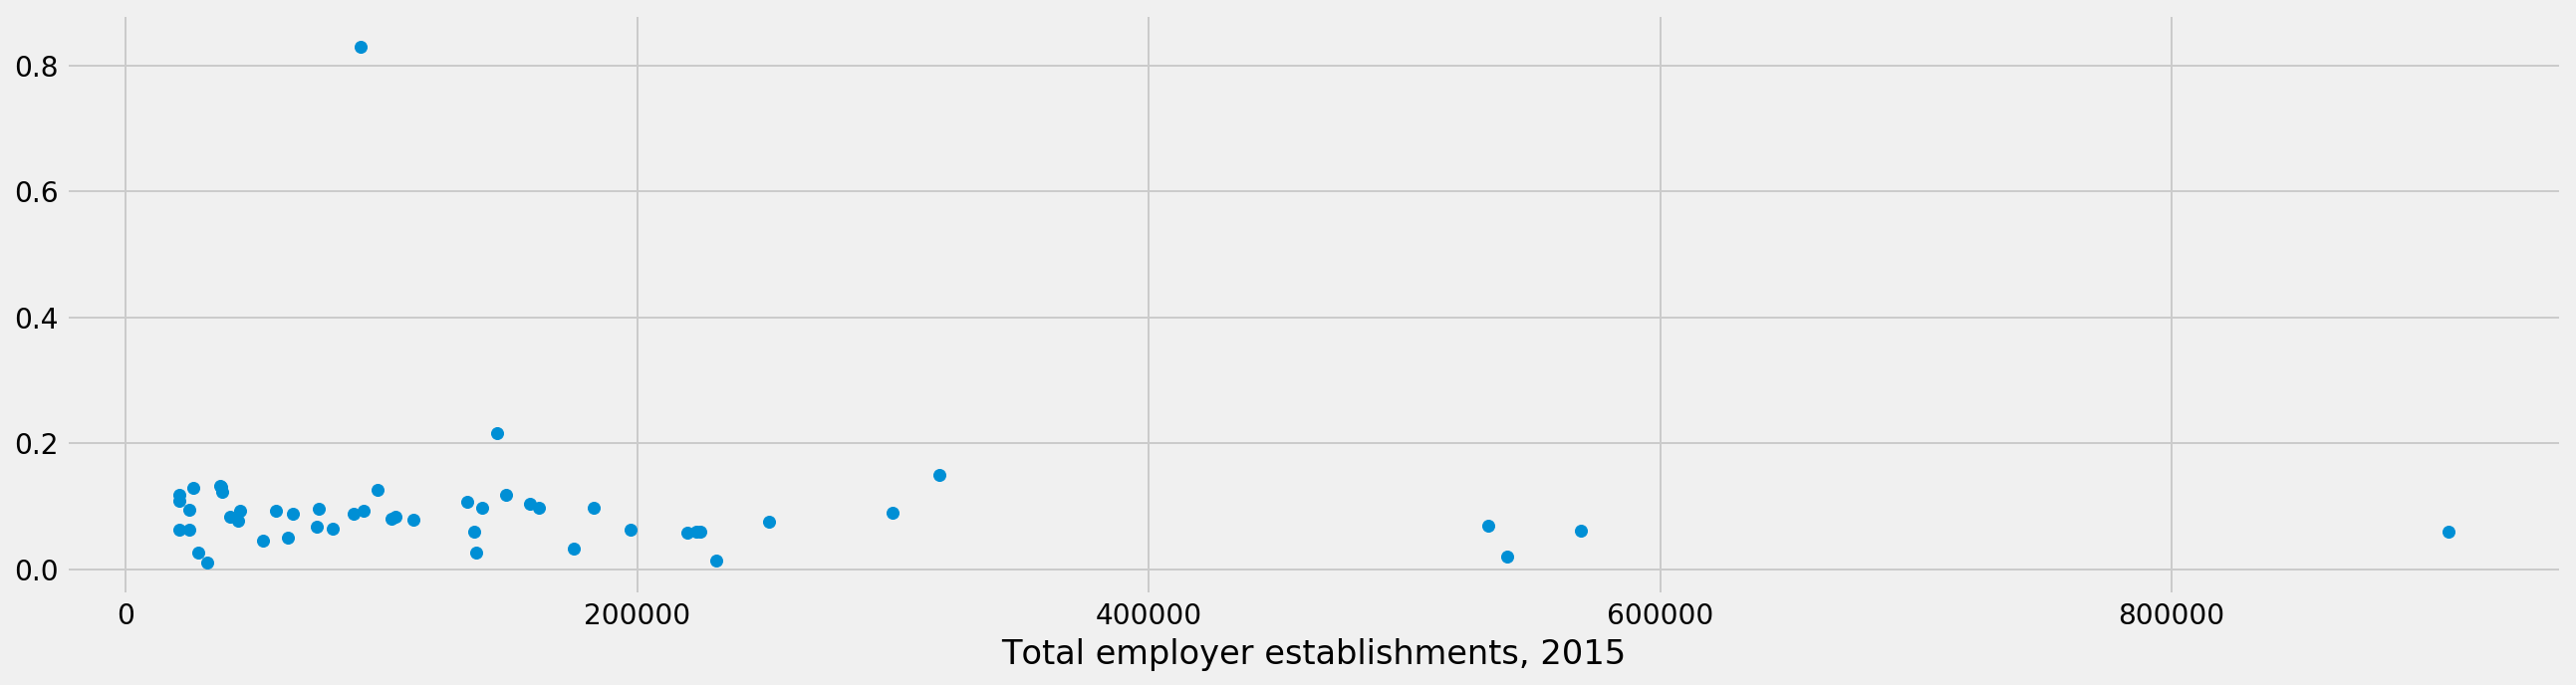

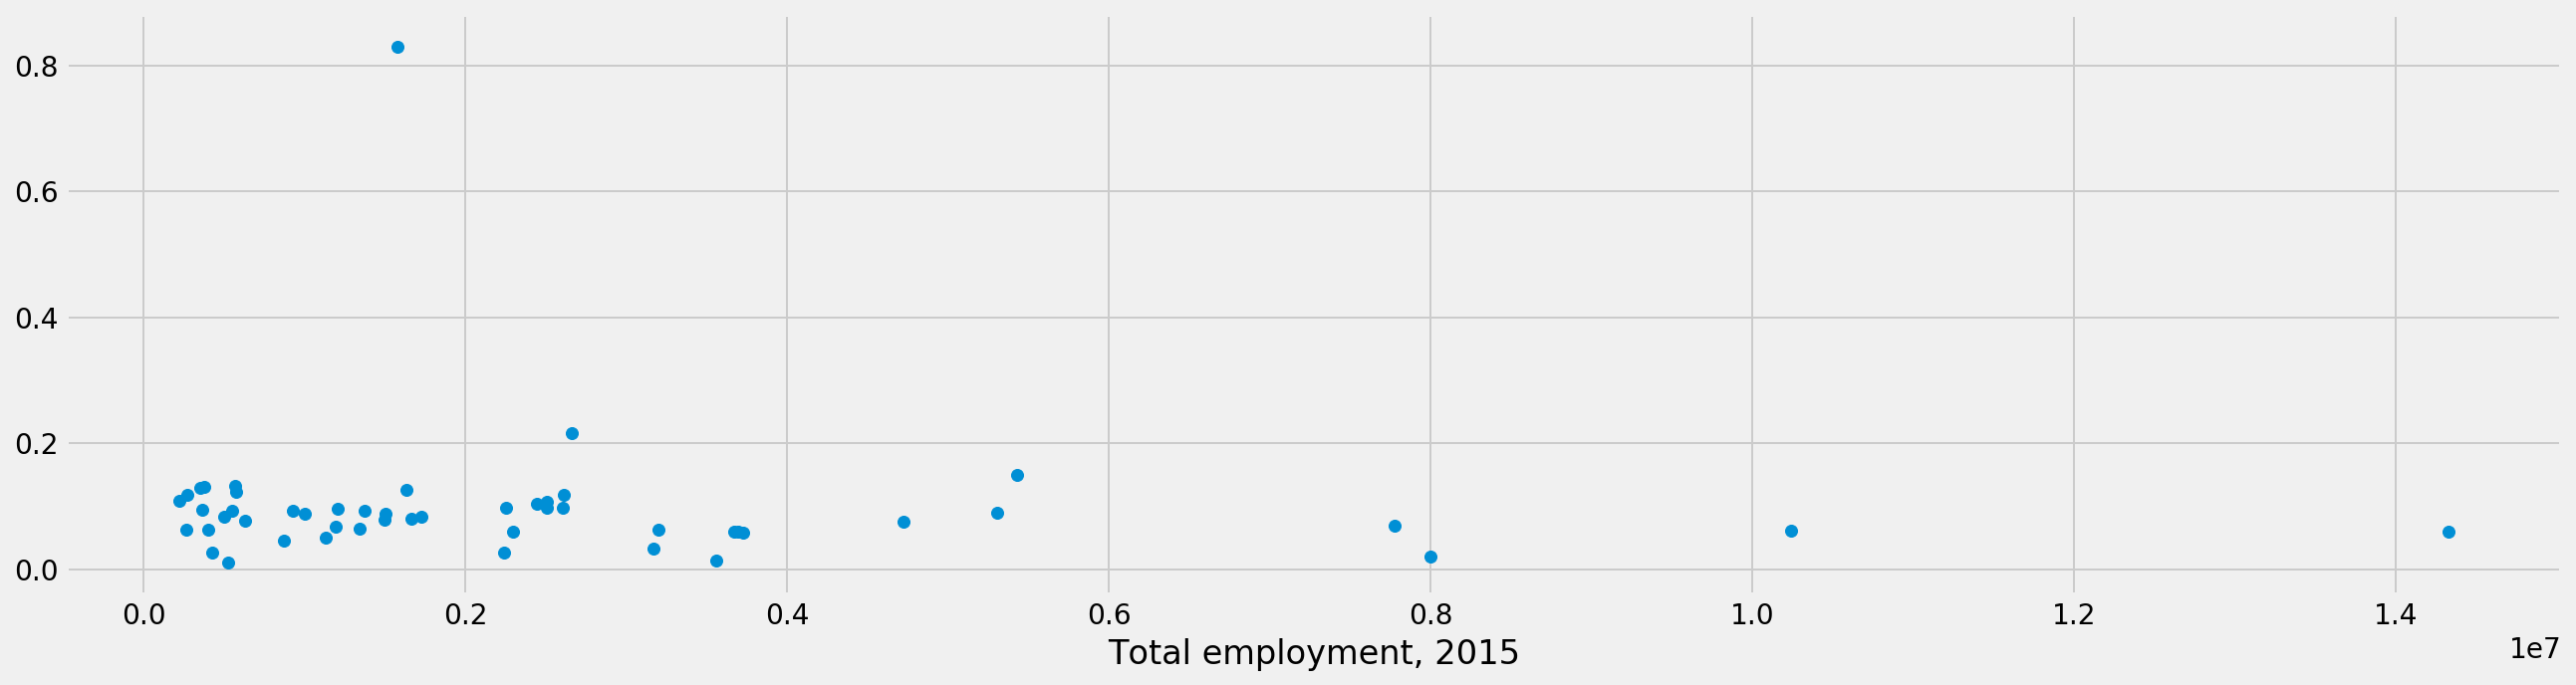

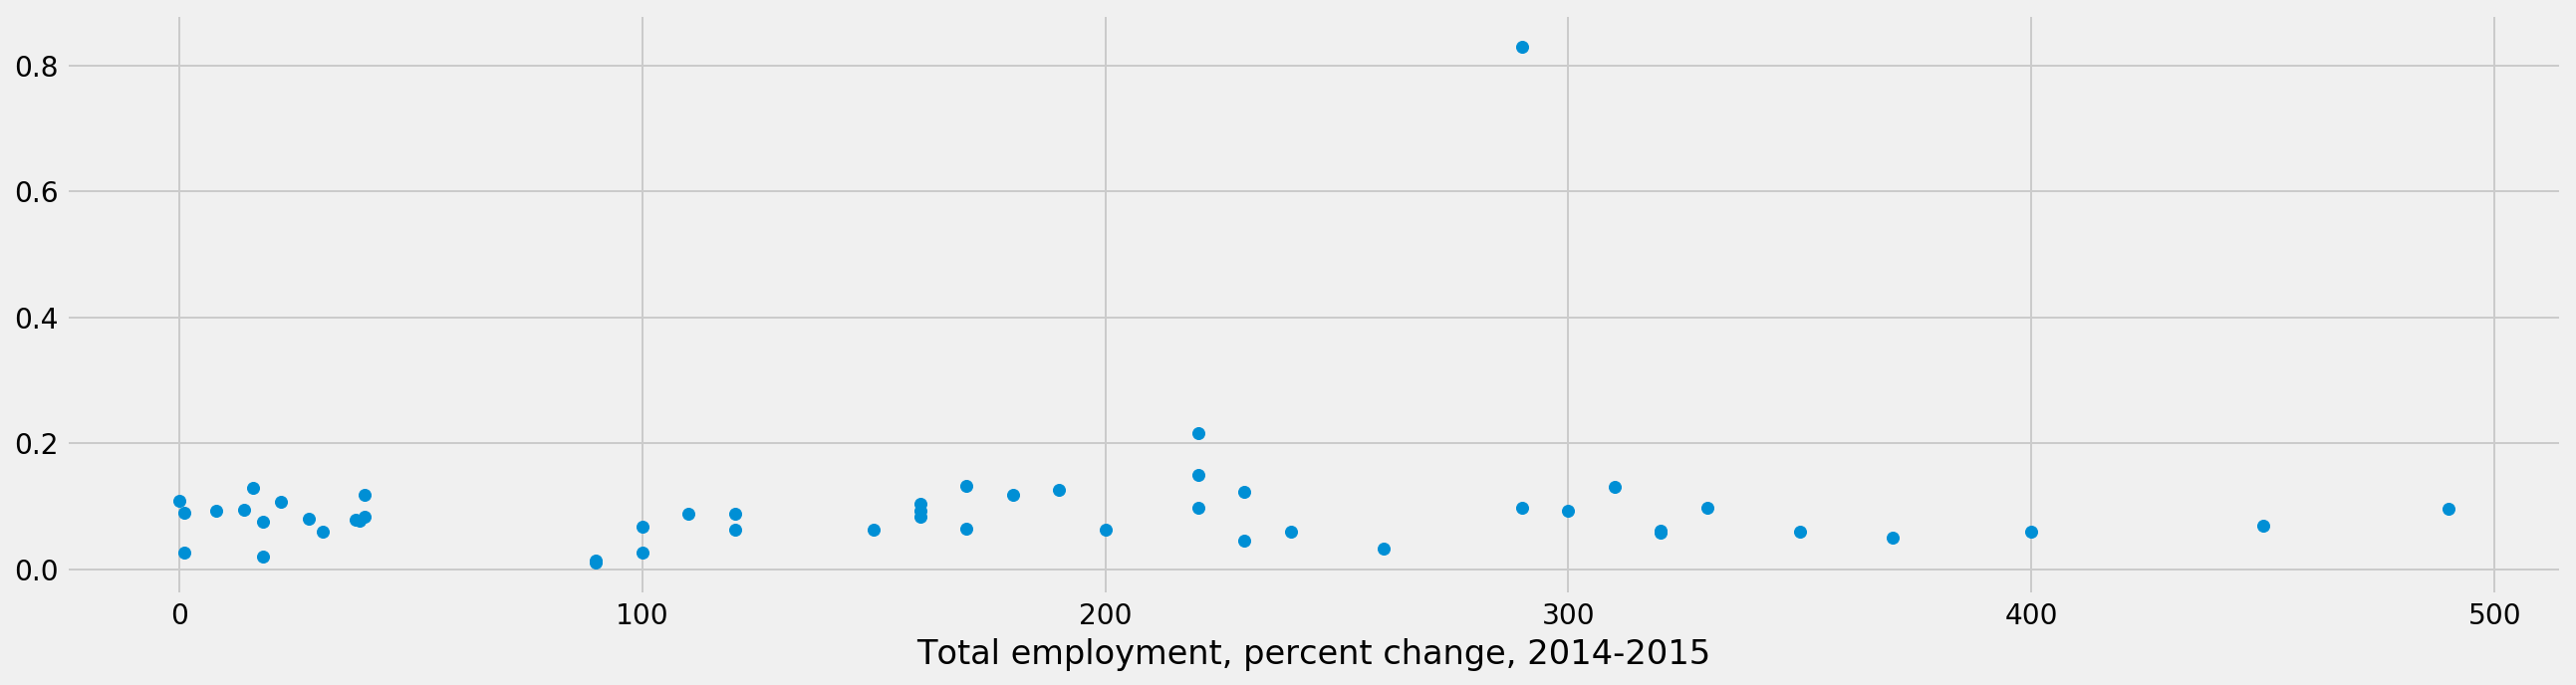

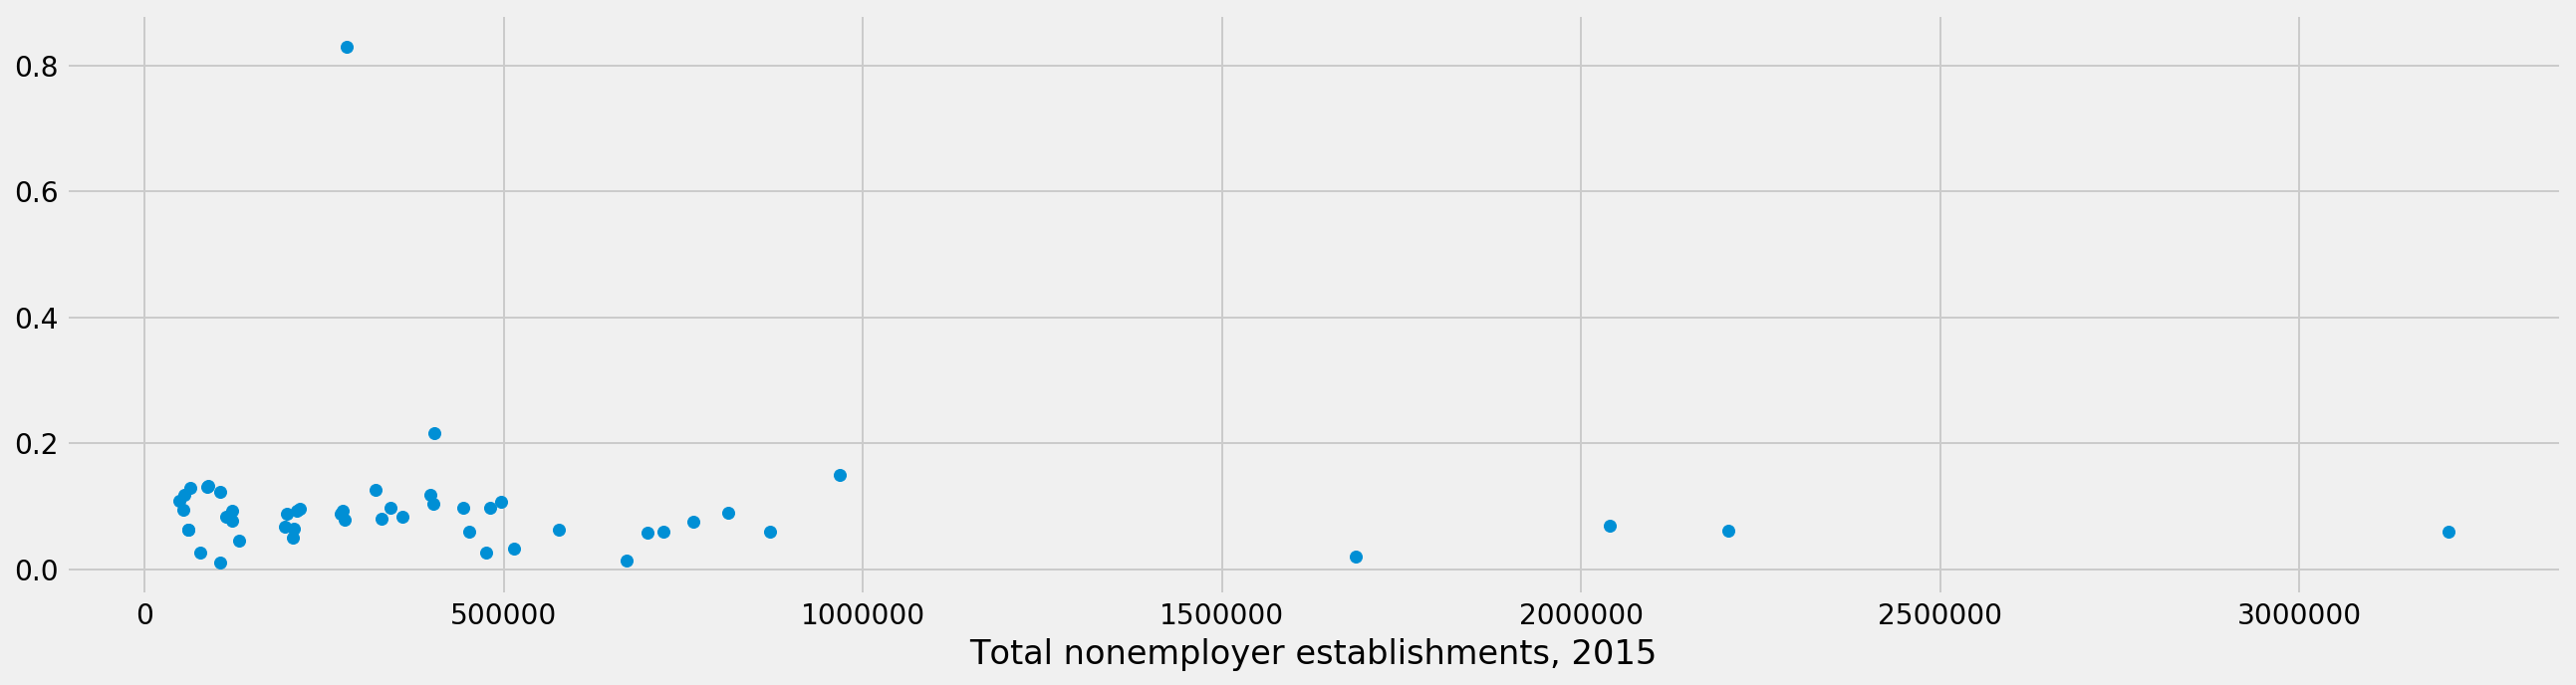

In [76]:
#figure2: Employment related Variable and Gun_Per_Capital 
#TODO : need help while iterating heterogeneous data type loops as gettign error as : "argument of type 'float' is not iterable"
#Also, how do I plot all in one plot with legend?
for col in list(fact):
    if 'employ' in col:
        plt.figure(figsize=(20,5))
        plt.scatter(fact[col],fact['Gun_Per_Capital_2016'], label =col)
        plt.xlabel(col)
plt.ylabel("Gun_Per_Capital_2016")
#plt.show()

In [ ]:
# ### Research Question 2  :
# Which states have had the highest growth and the lowest growth in gun registrations?

In [ ]:
# Alaska had the highest growth in gun registrations in Jul 2017, increasing by 403.20% compare to Apr 2010.
# Additionally,Alaska,Wyoming,Montana,Kansas,Arkansas are the top 5 state with highest growth in gun registrations in Jul 2017.Alaskas and Wyoming are only two state whose growth more than 400%
# also from the gun growth bar chart for all the states, we can see Utah and Indiana are the only two states whose gun growth are descreasing by more than 100%. On the other hand, there are 8 states' gun growth more than 300%, which can be considered outliers


In [79]:
#Calculate the increasing percentage of gun registrations from 2010 to 2016
result['gun_purchase_%_growth'] = result['2016_totals']/(result['2016_totals']-result['2010_totals'])

In [80]:
#Get the biggest growth percentage 
result['gun_purchase_%_growth'].max() # the result of the biggest growth perentage  is 403.20%

4.031971662526451

In [81]:
#List Top 5 rows by gun growth rate descending
result.nlargest(5,'gun_purchase_%_growth')

,state,2016_totals,2010_totals,"Population estimates, July 1, 2016, (V2016)","Population estimates base, April 1, 2010, (V2016)","Population, percent change - April 1, 2010 (estimates base) to July 1, 2016, (V2016)","Population, Census, April 1, 2010","Persons under 5 years, percent, July 1, 2016, (V2016)","Persons under 5 years, percent, April 1, 2010","Persons under 18 years, percent, July 1, 2016, (V2016)",...,D,F,FN,nan,S,X,Z,Gun_Per_Capital_2016,Gun_Per_Capital_2010,gun_purchase_%_growth
1,Alaska,87647,65909,741894.0,710249.0,450.0,710231.0,730.0,760.0,2520.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.118140,0.092797,4.031972
49,Wyoming,63594,47709,585501.0,563767.0,390.0,563626.0,650.0,710.0,2370.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.108615,0.084625,4.003399
25,Montana,136337,101095,1042520.0,989414.0,540.0,989415.0,600.0,630.0,2180.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.130776,0.102177,3.868594
15,Kansas,196548,144156,2907289.0,2853129.0,190.0,2853118.0,670.0,720.0,2460.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.067605,0.050526,3.751489
3,Arkansas,266014,191448,2988248.0,2916025.0,250.0,2915918.0,640.0,680.0,2360.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.089020,0.065654,3.567497


/usr/local/lib/python3.6/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


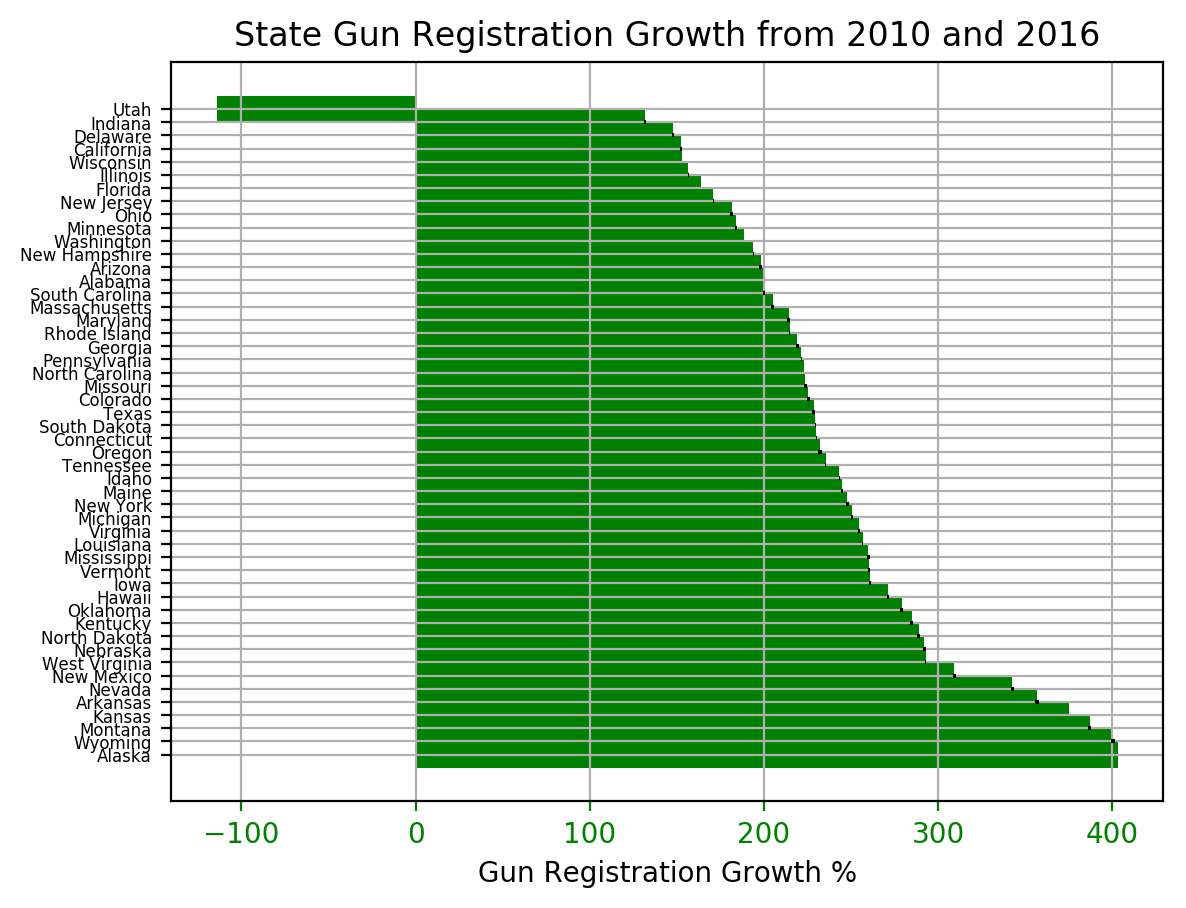

In [86]:
#Create Bar chart for every states'gun growth 
#Set the figure size 
plt.figure(figsize=(150,150))

plt.rcdefaults()
fig, ax = plt.subplots()

#Sort result data by gun_growth value
sorted = result.sort_values(by=['gun_purchase_%_growth'])

#create bar chart 
y_pos = np.arange(len(sorted['state']))
error = np.random.rand(len(sorted['state']))
ax.barh(y_pos, (sorted['gun_purchase_%_growth']*100), xerr=error, align='center',height=2,linewidth=5,color='green', ecolor='black')

#set x and y axis lable and make the label readable
ax.set_yticks(y_pos)
ax.set_xlabel("Gun Registration Growth %")
ax.set_yticklabels(sorted['state'],size=6)

#Invert x and y axis
ax.invert_yaxis()  # labels read top-to-bottom

#Set tick colors:
ax.tick_params(axis='x', colors='green')
ax.tick_params(axis='y', colors='black')

#Set the title
plt.title("State Gun Registration Growth from 2010 and 2016")     
plt.grid(True)
plt.legend(bbox_to_anchor=(1.1, 1.05))
plt.show()


In [87]:
# ### Research Question 3  :
# 
# What is the overall trend of gun purchases?

In [88]:
# From the line trend for gun purchases by years, we can tell that 
# from 1998 to 2016, the  overall of gun purchases is increasing. 
# From 1999 to 2005, the number of gun purchases remains stable, and from 2005 to 2016, the number of gun purchases increase from about 10 million to 2.7 million. From 2016 to 2017, the  number of gun purchases goes down, which is partially due to only 9 months in 2017 being calculated. 


In [89]:
# From the line trend for gun purchases by months, we can see the trend of gun purchases varies month to month repeatedly within year, despite the overall upwarding trend. December and January is around the gun perchase peak every year.


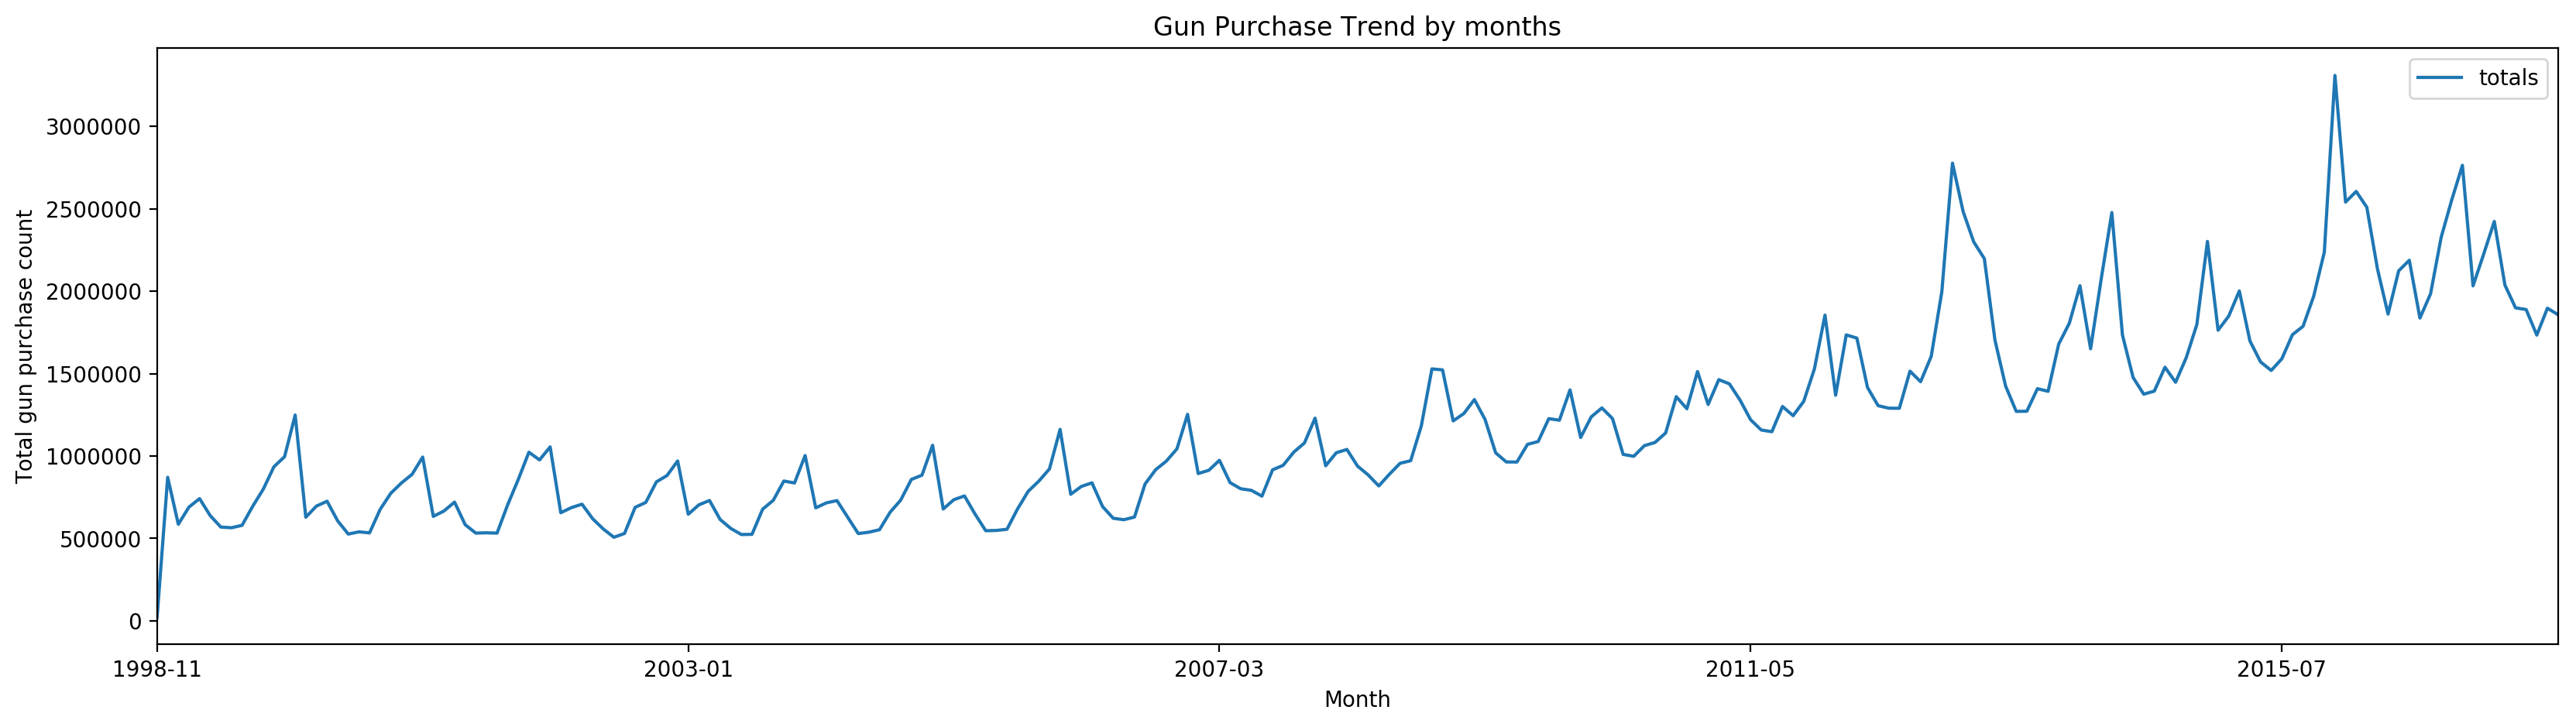

In [98]:
#Create line plot for gun purchase from 2010 to 2016 to observe the overall trend

#1. Create line chart using grouped data by year- months, which can be used to observe the change patten 
#during the season

#Assign figure size
plt.figure(figsize=(20,5))

gun_data.groupby('month')['totals'].sum().plot(kind='line',sharex=True, sharey=True, layout = (20, 1))
#set x and y axis lable name
plt.xlabel('Month')
plt.ylabel('Total gun purchase count')
plt.legend()
plt.title("Gun Purchase Trend by months")
plt.show()

In [99]:
gun_data.head(1)

,month,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,...,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals,year,months
0,2017-09,Alabama,16717,0,5734,6320,221,317,0,15,...,0,9,16,3,0,0,3,32019,2017,9


year
1998      891898
1999     9043747
2000     8427096
2001     8820045
2002     8367069
2003     8402244
2004     8579891
2005     8867055
2006     9993057
2007    11162272
2008    12692985
2009    13984953
2010    14320489
2011    16336732
2012    19463832
2013    20966704
2014    20860241
2015    23026288
2016    27425512
2017    17990528
Name: totals, dtype: int64


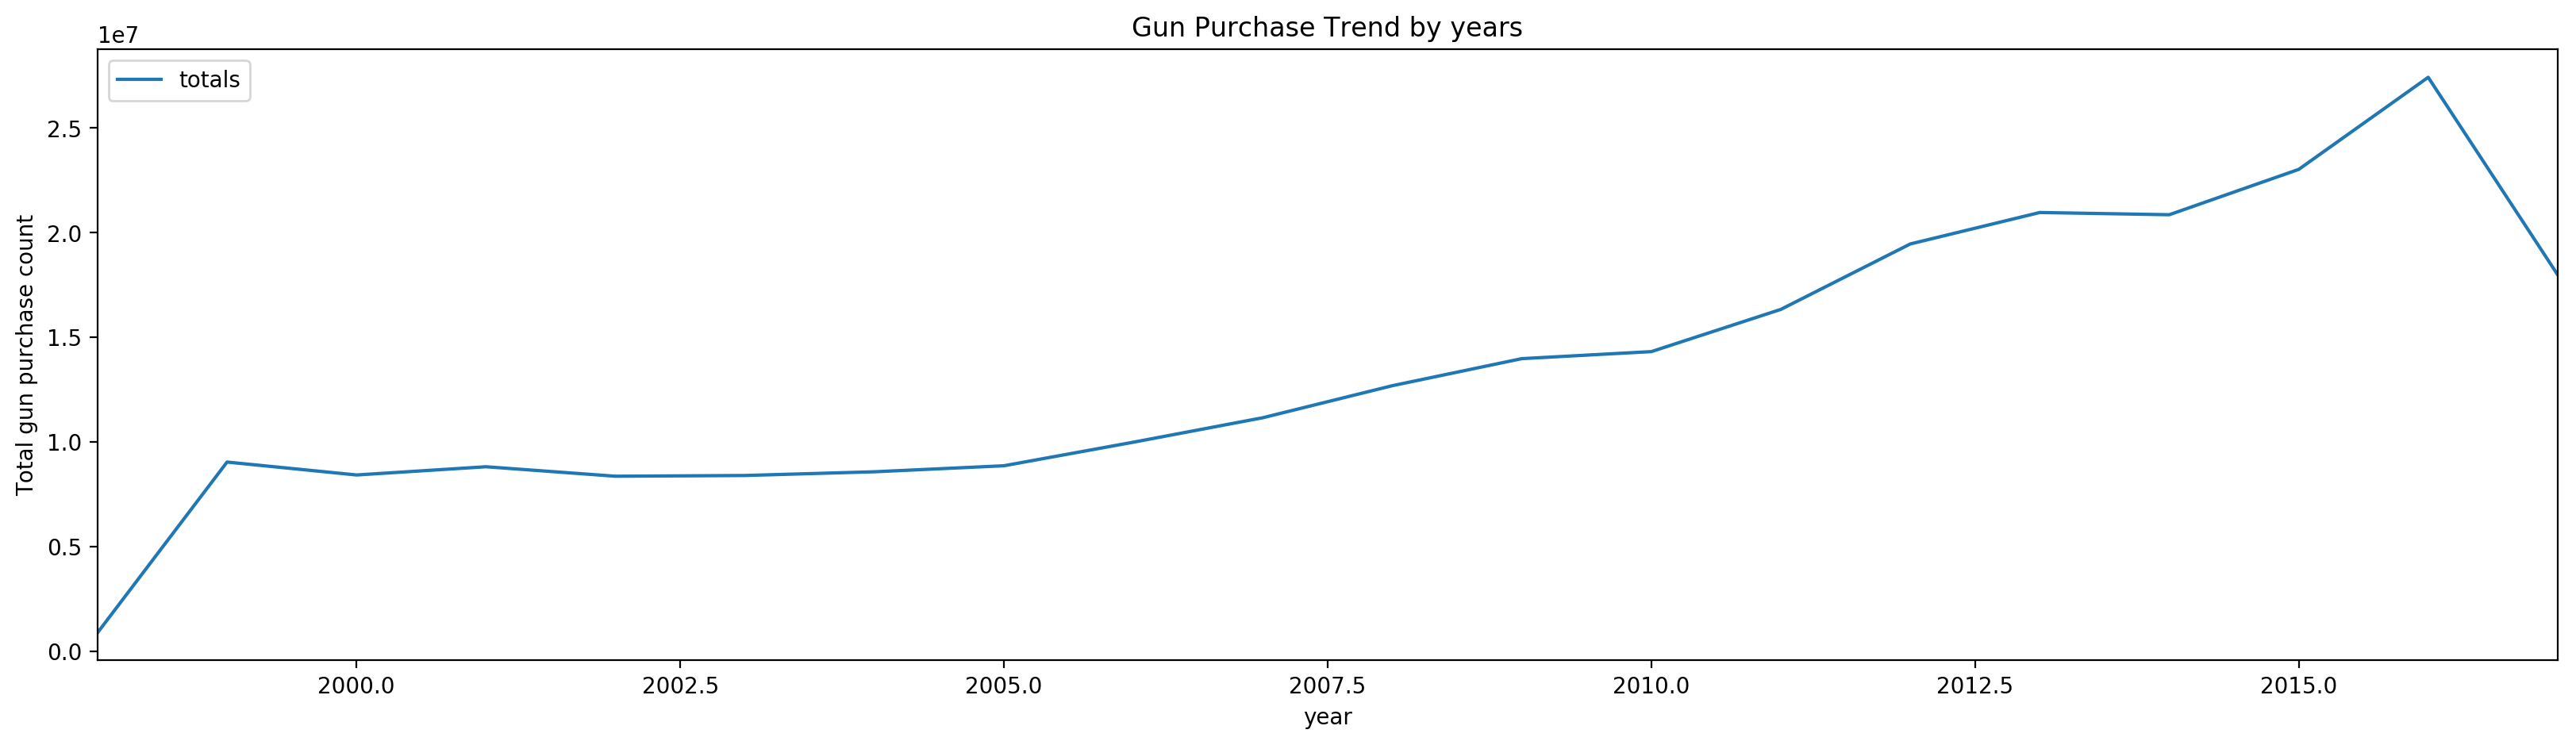

In [100]:

#2. Create line chart using grouped data by year, which can be used to observe the change during the season
plt.figure(figsize=(20,5))
print(gun_data.groupby('year')['totals'].sum())
gun_data.groupby('year')['totals'].sum().plot(kind='line')

plt.ylabel('Total gun purchase count')
plt.xlabel('year')
plt.title("Gun Purchase Trend by years")
plt.legend()
plt.show()